# Homework 2
## E94076021 汪柏安


### 1.(60%) 透過 make_blobs 方法(method)

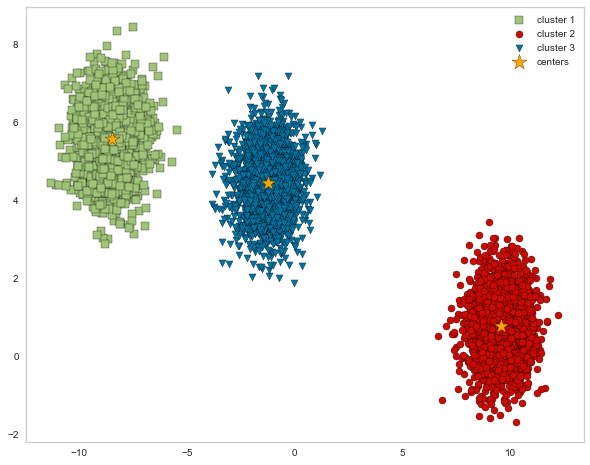

In [38]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

#學號:E94076021
#set make_blobs with Student ID
x, y = make_blobs(n_samples = 6021,
                  n_features = 2,
                  centers = 3,
                  cluster_std = 0.8,
                  shuffle = True,
                  random_state = 7)

# Set Kmeans models
km_model = KMeans(n_clusters = 2,
                 init='k-means++',
                 n_init = 10,
                 max_iter = 300,
                 tol = 1e-06,
                 random_state = 0)

# check Kmeans models
km_model.fit(x)
mk_y = km_model.predict(x)
km_model.cluster_centers_

# use boolean method to judeg
mk_y == 0
x_0 = x[mk_y == 0]
x_1 = x[mk_y == 1]
x_2 = x[mk_y == 2]
# check
# print("x_0",x_0)
# print("x_1",x_1)
# print("x_2",x_2)

#output the picture
plt.figure(figsize=(10,8))
plt.scatter(x_0[:,0],
           x_0[:,1],
           s=50, c='g',
           marker = 's', edgecolor = 'black',
           label = 'cluster 1')
plt.scatter(x_1[:,0],
           x_1[:,1],
           s=50, c='r',
           marker = 'o', edgecolor = 'black',
           label = 'cluster 2')
plt.scatter(x_2[:,0],
           x_2[:,1],
           s=50, c='b',
           marker = 'v', edgecolor = 'black',
           label = 'cluster 3')
plt.scatter(km_model.cluster_centers_[:,0],
           km_model.cluster_centers_[:,1],
           s = 250, marker = '*',
           c='orange', edgecolor = 'black',
           label = 'centers')
plt.legend(scatterpoints = 1)
plt.grid()
plt.show()



### 2.(20%) Printing whole the center points (Hint: using method)

In [39]:
print("center points",km_model.cluster_centers_)

center points [[-8.47905264  5.57702325]
 [ 9.55164735  0.78476062]
 [-1.23820211  4.44759935]]


### 3. (5% per each) 決定群數的方法有三種：Gap Statistic 與 (a) 與 (b)
(a) Silhouette score
(b) Canopy

### 4.(a)

Silhouetter Score: 0.761
Silhouetter Score: 0.831
Silhouetter Score: 0.644
Silhouetter Score: 0.475
Silhouetter Score: 0.310
Silhouetter Score: 0.317
Silhouetter Score: 0.325
Silhouetter Score: 0.330


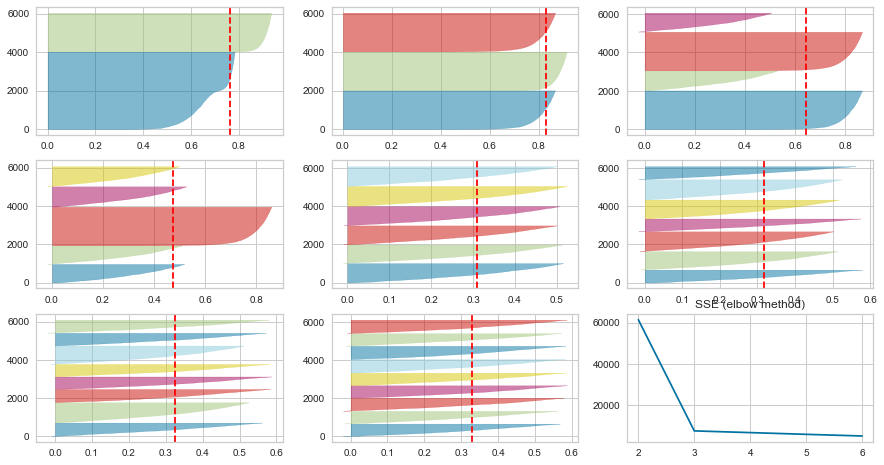

In [40]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 3, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7, 8, 9]:
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=100,
                tol = 1e-06, 
                random_state=0)
    km.fit(x)
    score = silhouette_score(x, km.labels_, metric='euclidean')
    print('Silhouetter Score: %.3f' % score)
    q, mod = divmod(i+1, 3)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)
    
distortions = []
plt.subplot(339)
k_range = range(2,7)
for i in k_range:
    km_model = KMeans(n_clusters=i).fit(x)
    distortions.append(km_model.inertia_)
plt.title('SSE (elbow method)')
plt.plot(k_range, distortions)


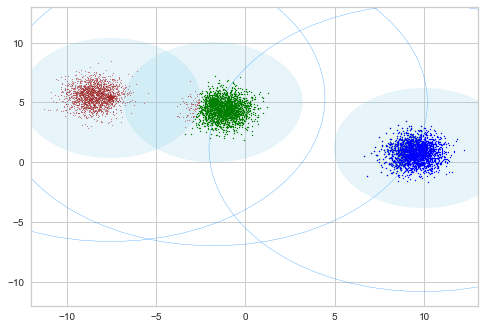

In [41]:

import math
import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

class Canopy:
    def __init__(self, dataset):
        self.dataset = dataset
        self.t1 = 0
        self.t2 = 0
 
    # 设置初始阈值
    def setThreshold(self, t1, t2):
        if t1 > t2:
            self.t1 = t1
            self.t2 = t2
        else:
            print('t1 needs to be larger than t2!')
 
    # 使用欧式距离进行距离的计算
    def euclideanDistance(self, vec1, vec2):
        return math.sqrt(((vec1 - vec2)**2).sum())
 
    # 根据当前dataset的长度随机选择一个下标
    def getRandIndex(self):
        return random.randint(0, len(self.dataset) - 1)
 
    def clustering(self):
        if self.t1 == 0:
            print('Please set the threshold.')
        else:
            canopies = []  # 用于存放最终归类结果
            while len(self.dataset) != 0:
                rand_index = self.getRandIndex()
                current_center = self.dataset[rand_index]  # 随机获取一个中心点，定为P点
                current_center_list = []  # 初始化P点的canopy类容器
                delete_list = []  # 初始化P点的删除容器
                self.dataset = np.delete(
                    self.dataset, rand_index, 0)  # 删除随机选择的中心点P
                for datum_j in range(len(self.dataset)):
                    datum = self.dataset[datum_j]
                    distance = self.euclideanDistance(
                        current_center, datum)  # 计算选取的中心点P到每个点之间的距离
                    if distance < self.t1:
                        # 若距离小于t1，则将点归入P点的canopy类
                        current_center_list.append(datum)
                    if distance < self.t2:
                        delete_list.append(datum_j)  # 若小于t2则归入删除容器
                # 根据删除容器的下标，将元素从数据集中删除
                self.dataset = np.delete(self.dataset, delete_list, 0)
                canopies.append((current_center, current_center_list))
        return canopies
 
 
def showCanopy(canopies, dataset, t1, t2):
    fig = plt.figure()
    sc = fig.add_subplot(111)
    colors = ['brown', 'green', 'blue', 'y', 'r', 'tan', 'dodgerblue', 'deeppink', 'orangered', 'peru', 'blue', 'y', 'r',
              'gold', 'dimgray', 'darkorange', 'peru', 'blue', 'y', 'r', 'cyan', 'tan', 'orchid', 'peru', 'blue', 'y', 'r', 'sienna']
    markers = ['*', 'h', 'H', '+', 'o', '1', '2', '3', ',', 'v', 'H', '+', '1', '2', '^',
               '<', '>', '.', '4', 'H', '+', '1', '2', 's', 'p', 'x', 'D', 'd', '|', '_']
    for i in range(len(canopies)):
        canopy = canopies[i]
        center = canopy[0]
        components = canopy[1]
        sc.plot(center[0], center[1], marker=markers[i],
                color=colors[i], markersize=10)
        t1_circle = plt.Circle(
            xy=(center[0], center[1]), radius=t1, color='dodgerblue', fill=False)
        t2_circle = plt.Circle(
            xy=(center[0], center[1]), radius=t2, color='skyblue', alpha=0.2)
        sc.add_artist(t1_circle)
        sc.add_artist(t2_circle)
        for component in components:
            sc.plot(component[0], component[1],
                    marker=markers[i], color=colors[i], markersize=1.5)
    maxvalue = np.amax(dataset)
    minvalue = np.amin(dataset)
    plt.xlim(minvalue - t1, maxvalue + t1)
    plt.ylim(minvalue - t1, maxvalue + t1)
    plt.show()
 
 
x, y = make_blobs(n_samples = 6021,
                  n_features = 2,
                  centers = 3,
                  cluster_std = 0.8,
                  shuffle = True,
                  random_state = 7)

# Set Kmeans models
km_model = KMeans(n_clusters = 3,
                 init='k-means++',
                 n_init = 10,
                 max_iter = 300,
                 tol = 1e-06,
                 random_state = 0)

km_model.fit(x)
mk_y = km_model.predict(x)                 

km_model_cluster = km_model.cluster_centers_

t1 =12
t2 =5
gc = Canopy(x)
gc.setThreshold(t1,t2)
canopies = gc.clustering()
showCanopy(canopies, dataset, t1, t2)